# Project 5: Storytelling Data Visualization on Exchange Rates

Target: analyse the exchange rate from euros to us dollars and euros and pound

Source: https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020

## I. Opening data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2021.csv')
pd.set_option('max_columns', exchange_rates.shape[1])
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

In [4]:
exchange_rates.columns

Index(['Period\Unit:', '[Argentine peso ]', '[Australian dollar ]',
       '[Bulgarian lev ]', '[Brazilian real ]', '[Canadian dollar ]',
       '[Swiss franc ]', '[Chinese yuan renminbi ]', '[Cypriot pound ]',
       '[Czech koruna ]', '[Danish krone ]', '[Algerian dinar ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Moroccan dirham ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]',
       '[New Taiwan dollar ]

In [5]:
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Algerian dinar ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Moroccan dirham ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,7.4359,NaN,NaN,0.85705,NaN,9.1188,7.5055,353.97,16742.86,3.7635,86.2720,152.0,128.18,1393.32,NaN,NaN,NaN,NaN,23.6419,4.9098,10.2430,1.6694,58.845,4.5997,4.9493,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,7.4360,NaN,NaN,0.85363,NaN,9.1691,7.5092,351.49,16762.90,3.7752,86.5335,151.4,129.61,1386.26,NaN,NaN,NaN,NaN,23.4722,4.9140,10.1208,1.6658,58.819,4.5804,4.9488,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,7.4360,NaN,NaN,0.85025,NaN,9.1575,7.5041,350.19,16766.34,3.7742,86.4730,151.2,128.67,1380.44,NaN,NaN,NaN,NaN,23.3728,4.8952,10.1293,1.6548,58.715,4.5763,4.9488,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,7.4361,NaN,NaN,0.85510,NaN,9.2021,7.4838,348.86,16826.33,3.7881,86.8625,151.2,129.11,1380.77,NaN,NaN,NaN,NaN,23.4927,4.9170,10.1418,1.6666,58.742,4.5501,4.9485,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,7.4361,NaN,NaN,0.85260,NaN,9.1899,7.4760,350.05,16857.27,3.7968,87.0370,151.2,130.08,1382.66,NaN,NaN,NaN,NaN,23.5067,4.9170,10.1745,1.6625,58.868,4.5542,4.9485,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [6]:
exchange_rates.isnull().sum()

Period\Unit:                   0
[Argentine peso ]            495
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3532
[Czech koruna ]                0
[Danish krone ]                0
[Algerian dinar ]            495
[Estonian kroon ]           2748
[UK pound sterling ]           0
[Greek drachma ]            5358
[Hong Kong dollar ]            0
[Croatian kuna ]             268
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         1719
[Latvian lats ]             1974
[Moroccan dirham ]           495
[Maltese lira ]             3532
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian

In [7]:
exchange_rates.rename(columns={'Period\\Unit:':'Time','[US dollar ]':'US_dollar','[UK pound sterling ]':'UK_pound'}, inplace =True)


In [8]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

In [9]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      5878 non-null   datetime64[ns]
 1   [Argentine peso ]         5383 non-null   object        
 2   [Australian dollar ]      5878 non-null   object        
 3   [Bulgarian lev ]          5476 non-null   object        
 4   [Brazilian real ]         5610 non-null   object        
 5   [Canadian dollar ]        5878 non-null   object        
 6   [Swiss franc ]            5878 non-null   object        
 7   [Chinese yuan renminbi ]  5610 non-null   object        
 8   [Cypriot pound ]          2346 non-null   object        
 9   [Czech koruna ]           5878 non-null   object        
 10  [Danish krone ]           5878 non-null   object        
 11  [Algerian dinar ]         5383 non-null   object        
 12  [Estonian kroon ]   

In [10]:
print(f'\033[1mNumber of rows:\033[0m{exchange_rates.shape[0]}\n'  #\033[1m: in dam, \033[0m: in thuong
     f'\033[1mNumber of columns:\033[0m{exchange_rates.shape[1]}')

Number of rows:5878
Number of columns:45


In [11]:
euro_usa = exchange_rates[['Time','US_dollar']]
euro_gdp = exchange_rates[['Time','UK_pound']]

In [12]:
euro_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5878 non-null   datetime64[ns]
 1   US_dollar  5878 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 92.0+ KB


In [13]:
euro_usa['US_dollar'].describe()

count     5878
unique    3576
top          -
freq        62
Name: US_dollar, dtype: object

In [14]:
euro_usa['US_dollar'].value_counts(dropna=False)

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
1.2564     1
1.4217     1
1.3332     1
1.1369     1
0.8839     1
Name: US_dollar, Length: 3576, dtype: int64

In [15]:
euro_usa[euro_usa['US_dollar']=='-'].head()

,Time,US_dollar
2401,2012-05-01,-
2417,2012-04-09,-
2418,2012-04-06,-
2492,2011-12-26,-
2667,2011-04-25,-


In [16]:
euro_gdp['UK_pound'].value_counts(dropna=False)

-          62
0.63040     7
0.87750     7
0.90430     7
0.68880     7
           ..
0.65190     1
0.86770     1
0.89840     1
0.90160     1
0.84175     1
Name: UK_pound, Length: 3567, dtype: int64

In [17]:
euro_usa=euro_usa[euro_usa['US_dollar']!='-']
euro_usa['US_dollar']=euro_usa['US_dollar'].astype(float)


In [18]:
euro_usa['US_dollar'].value_counts(bins=10)

(1.057, 1.135]    1141
(1.289, 1.367]    1046
(1.135, 1.212]     998
(1.212, 1.289]     905
(1.367, 1.444]     476
(0.823, 0.903]     333
(0.903, 0.98]      302
(0.98, 1.057]      292
(1.444, 1.522]     215
(1.522, 1.599]     108
Name: US_dollar, dtype: int64

In [19]:
euro_gdp=euro_gdp[euro_gdp['UK_pound']!='-']
euro_gdp['UK_pound']=euro_gdp['UK_pound'].astype(float)

In [20]:
euro_gdp['UK_pound'].value_counts(bins=10)

(0.856, 0.897]    1324
(0.653, 0.693]    1103
(0.816, 0.856]     840
(0.612, 0.653]     674
(0.775, 0.816]     588
(0.693, 0.734]     508
(0.897, 0.938]     390
(0.57, 0.612]      201
(0.734, 0.775]     172
(0.938, 0.979]      16
Name: UK_pound, dtype: int64

In [23]:
euro_usa['rolling_mean'] = euro_usa['US_dollar'].rolling(30).mean() #du lieu theo thang

In [24]:
euro_usa['rolling_mean']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5873    1.143817
5874    1.145150
5875    1.146783
5876    1.148830
5877    1.150667
Name: rolling_mean, Length: 5816, dtype: float64

In [25]:
euro_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5816 non-null   datetime64[ns]
 1   US_dollar     5816 non-null   float64       
 2   rolling-mean  5787 non-null   float64       
 3   rolling_mean  5787 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 227.2 KB


Now we will plot 2 graphs: EUR-USD exchange rate evolution with and without smoothing to see the difference. 

In [36]:
columns = ['US_dollar','rolling_mean']
titles = ['EUR-USD exchange rate evolution \nwithout rolling mean','EUR-USA exchange rate evolution \nwith rolling mean']
def create_line(df,title,xlabel='Month',column='rolling_mean',title_font=25,label_font=20,tick_font=14,x_min='1999-01-01',x_max='2021-09-20',y_min=None,y_max=None):
    plt.plot(df['Time'],df[column],color='BLue')
    plt.title(title, fontsize = title_font)
    plt.xlabel(xlabel, fontsize = label_font)
    plt.ylabel('Exchange rate', fontsize = label_font)
    plt.xticks(fontsize = tick_font)
    plt.yticks(fontsize = tick_font)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    sns.despine

In [1]:
plt.figure(figsize=(12,5))
for i in range(1,3):
    plt.subplot(1,2,i)
    create_line(df=euro_usa, title=titles[i-1],column=columns[i-1],title_font=18,label_font=14,tick_font=None,y_min=0.75,y_max=2)

NameError: name 'plt' is not defined

In [39]:
columns_uk = ['UK_pound','rolling_mean']
titles_uk = ['EUR-GDP exchange rate evolution \nwithout rolling mean','EUR-GDP exchange rate evolution \nwith rolling mean']

In [40]:
euro_gdp['rolling_mean'] = euro_gdp['UK_pound'].rolling(30).mean() #du lieu theo thang

ConversionError: Failed to convert value(s) to axis units: '1999-01-01'

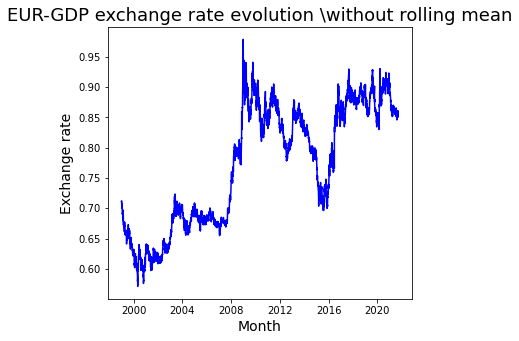

In [35]:
plt.figure(figsize=(12,5))
for i in range(1,3):
    plt.subplot(1,2,i)
    create_line(df=euro_gdp, title=titles[i-1],column=columns[i-1],title_font=18,label_font=14,tick_font=None,y_min=0.75,y_max=2)

In [44]:
crisis = euro_usa.copy()[(euro_usa['Time'].dt.year >=2006)&(euro_usa['Time'].dt.year <=2009)]
crisis_7_8 = euro_usa.copy()[(euro_usa['Time'].dt.year >= 2007)&(euro_usa['Time'].dt.year <= 2008)]

13077.05
14681.95


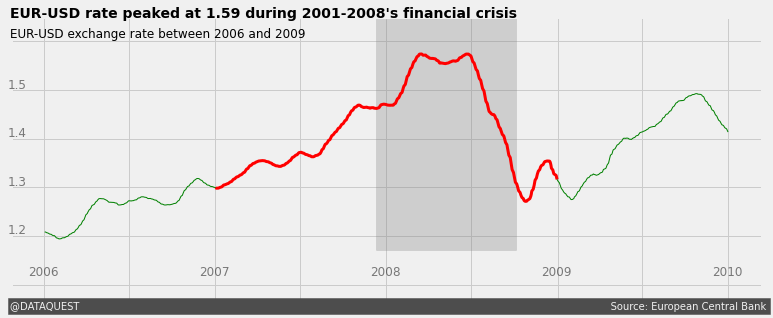

In [66]:
style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(12,5))
ax.set_ylim(1.05,1.65)
ax.plot(crisis['Time'],crisis['rolling_mean'],linewidth=1,color='green')
ax.plot(crisis_7_8['Time'],crisis_7_8['rolling_mean'],linewidth=3,color='red')
ax.set_xticklabels([])
ax.set_yticklabels([])
xmin,xmax = plt.xlim()
print(xmin)
print(xmax)
x0 = 13115
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x0,1.12,year,alpha=0.5,fontsize=12)
    x0 += 365
y0 = 1.205
for rate in ['1.2','1.3','1.4','1.5']:
    ax.text(13070,y0,rate,alpha=0.5,fontsize=12)
    y0 += 0.1
    
ax.text(13077,1.65,'EUR-USD rate peaked at 1.59 during 2001-2008\'s financial crisis', weight='bold')
ax.text(13077,1.61,'EUR-USD exchange rate between 2006 and 2009', size = 12)
ax.text(13077,1.05,'@DATAQUEST'+' '*170+'Source: European Central Bank',color='#f0f0f0',backgroundcolor='#4d4d4d',size = 10)
ax.axvspan(xmin=13857,xmax=14157,ymin=0.2,color='gray',alpha=0.3)

In [69]:
bush_obama_trump = euro_usa.copy()[(euro_usa['Time'].dt.year>=2001)&(euro_usa['Time'].dt.year<2021)]
bush = euro_usa.copy()[(euro_usa['Time'].dt.year>=2001)&(euro_usa['Time'].dt.year<2009)]
obama = euro_usa.copy()[(euro_usa['Time'].dt.year>=2009)&(euro_usa['Time'].dt.year<2017)]
trump = euro_usa.copy()[(euro_usa['Time'].dt.year>=2017)&(euro_usa['Time'].dt.year<2021)]


10958.85
18992.15


Text(10600, 2.05, 'EURO-USD rate average 1.22 under the last three US presidents')

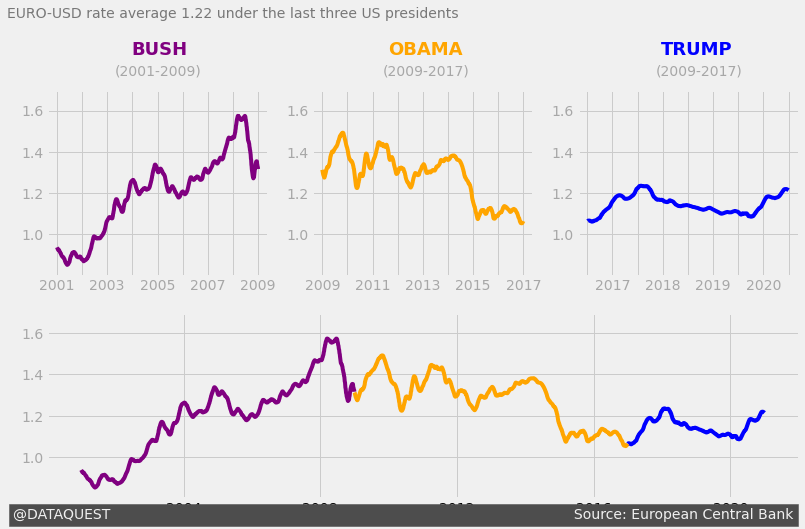

In [85]:
style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1,ax2,ax3,ax4]

for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6'],alpha=0.3)
    
ax1.plot(bush['Time'],bush['rolling_mean'],color='purple')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'], alpha=0.3)

ax2.plot(obama['Time'],obama['rolling_mean'],color='orange')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'], alpha=0.3)

ax3.plot(trump['Time'],trump['rolling_mean'],color='blue')
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'], alpha=0.3)
 
ax4.plot(bush['Time'],bush['rolling_mean'],color ='purple')
ax4.plot(obama['Time'],obama['rolling_mean'],color ='orange')
ax4.plot(trump['Time'],trump['rolling_mean'],color ='blue')

xmin,xmax = plt.xlim()
print(xmin)
print(xmax)

ax1.text(12400,1.87,'BUSH',fontsize=18, weight = 'bold',color='purple')
ax1.text(12160,1.77,'(2001-2009)',fontsize=14,alpha=0.3)

ax2.text(15200,1.87,'OBAMA',fontsize=18, weight = 'bold',color='orange')
ax2.text(15120,1.77,'(2009-2017)',fontsize=14,alpha=0.3)

ax3.text(17700,1.87,'TRUMP',fontsize=18, weight = 'bold',color='blue')
ax3.text(17660,1.77,'(2009-2017)',fontsize=14,alpha=0.3)

ax4.text(10600,0.7,'@DATAQUEST'+' '*103 + 'Source: European Central Bank',color ='#f0f0f0',backgroundcolor='#4d4d4d',size = 14)
ax1.text(10600,2.05,'EURO-USD rate average 1.22 under the last three US presidents',fontsize=14,alpha =0.5)